<a href="https://colab.research.google.com/github/jeevsssss/artificial-Intelligence/blob/main/waste_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/"

/content/drive/MyDrive


In [ ]:
# !unzip recycling\ waste.zip

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [ ]:
# let's prepare the data and generate the data

from keras_preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 8369 images belonging to 9 classes.


In [ ]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [ ]:
from tensorflow.keras.models import load_model
model= load_model('/content/drive/MyDrive/classifyWaste.h5')
# result = model.fit(train_data, epochs = 28, steps_per_epoch=len(train_data))

In [ ]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit(train_data, epochs = 28, steps_per_epoch=len(train_data))


Epoch 1/28
262/262 [==============================] - 6047s 23s/step - loss: 1.9211 - accuracy: 0.3380
Epoch 2/28
262/262 [==============================] - 167s 637ms/step - loss: 1.6162 - accuracy: 0.4483
Epoch 3/28
262/262 [==============================] - 166s 632ms/step - loss: 1.4634 - accuracy: 0.4970
Epoch 4/28
262/262 [==============================] - 165s 629ms/step - loss: 1.3780 - accuracy: 0.5273
Epoch 5/28
262/262 [==============================] - 166s 631ms/step - loss: 1.3176 - accuracy: 0.5482
Epoch 6/28
262/262 [==============================] - 166s 633ms/step - loss: 1.2715 - accuracy: 0.5627
Epoch 7/28
262/262 [==============================] - 166s 634ms/step - loss: 1.2653 - accuracy: 0.5724
Epoch 8/28
262/262 [==============================] - 166s 634ms/step - loss: 1.2169 - accuracy: 0.5842
Epoch 9/28
262/262 [==============================] - 165s 631ms/step - loss: 1.2011 - accuracy: 0.5936
Epoch 10/28
262/262 [==============================] - 166s 633ms

In [ ]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")




In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/SavedModels/classify1.h5')

Saving Beer_bottles_2018_G1.jpg to Beer_bottles_2018_G1.jpg


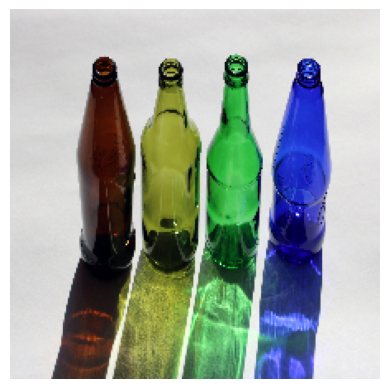

1/1 [==============================] - 7s 7s/step
Your waste material is  glass  with  100.0  % accuracy


In [ ]:
uploaded = files.upload()
# waste_prediction("test6.jpg")
image_filename = list(uploaded.keys())[0]
waste_prediction(image_filename)

In [ ]:
# plt.title("Accuracy")
# plt.plot(result.history["accuracy"])
# plt.show()

In [ ]:
# plt.title("Loss")
# plt.plot(result.history["loss"])
# plt.show()

In [ ]:
model.save("classifyWaste.h5")